# <center> Ultimate Data Challenge </center>

In [217]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import json
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### Part 1 -- Exploratory data analysis

In this section, exploratory data analysis, login times for every 15 minutes are visualized.  This exploratory data analysis involved several pre-processing steps, shown below.

Read in file. 

In [231]:
timestamps = pd.read_json('logins.json')

Inspect data.

In [232]:
timestamps.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [233]:
timestamps.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


Convert to datetime and inspect the head.

In [234]:
timestamps['login_time'] = pd.to_datetime(timestamps['login_time'], unit='s')

In [235]:
timestamps.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Reset index of dataframe.

In [223]:
timestamps = timestamps.reset_index().set_index('login_time')

In [224]:
timestamps.head()

,index
login_time,
1970-01-01 20:13:18,0
1970-01-01 20:16:10,1
1970-01-01 20:16:37,2
1970-01-01 20:16:36,3
1970-01-01 20:26:21,4


Create new, resampled dataframe that divides data into 15 minute intervals.

In [75]:
fifteen_min_freq_with_dates = timestamps.resample('15T').count()

In [76]:
fifteen_min_freq_with_dates.head()

,index
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Create new dataframe with dates omitted.

In [77]:
fifteen_min_freq_no_dates = fifteen_min_freq_with_dates.copy()

In [78]:
fifteen_min_freq_no_dates.index = fifteen_min_freq_no_dates.index.time

In [79]:
fifteen_min_freq_no_dates.head()

,index
20:00:00,2
20:15:00,6
20:30:00,9
20:45:00,7
21:00:00,1


Sum frequency for all 15-minute intervals represented in data.

In [80]:
fifteen_min_freq_no_dates = fifteen_min_freq_no_dates.groupby(level=0).sum()

In [81]:
fifteen_min_freq_no_dates.head()

,index
00:00:00,1439
00:15:00,1547
00:30:00,1525
00:45:00,1482
01:00:00,1549


Plot number of logins for each 15-minute interval in the data.

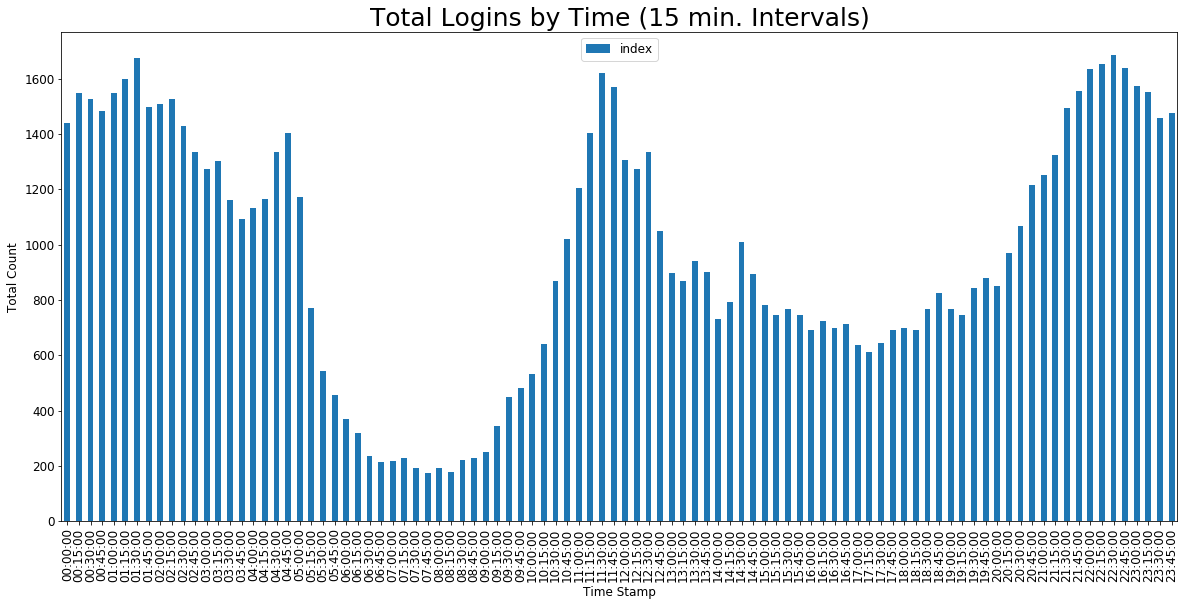

In [82]:
plt.rcParams["figure.figsize"] = (20, 9)
plt.rcParams.update({'font.size': 12})

fifteen_min_freq_no_dates.plot(kind='bar')
plt.xlabel('Time Stamp')
plt.ylabel('Total Count')
plt.title("Total Logins by Time (15 min. Intervals)", fontsize=25)
plt.figure(figsize=(15, 15))
plt.show()

As a whole in the data, logins significantly taper off at around 5:00 AM and then increase agin at around 9:30.  There is also another dip in logins in the mid-afternoon period.

Four months are represented in the data: January, February, March, and April.  Does this general 24-hour login pattern differ depending on the month? Let's find out. 

In [83]:
fifteen_min_freq_with_dates.head()

,index
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [84]:
fifteen_min_freq_with_dates['month'] = fifteen_min_freq_with_dates.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%b'))

In [85]:
fifteen_min_freq_with_dates['time'] = fifteen_min_freq_with_dates.index.to_series().apply(lambda x: dt.datetime.strftime(x, '%H:%M'))

In [86]:
fifteen_min_freq_with_dates.head()

,index,month,time
login_time,,,
1970-01-01 20:00:00,2,Jan,20:00
1970-01-01 20:15:00,6,Jan,20:15
1970-01-01 20:30:00,9,Jan,20:30
1970-01-01 20:45:00,7,Jan,20:45
1970-01-01 21:00:00,1,Jan,21:00


In [87]:
grouped_by_month = fifteen_min_freq_with_dates.groupby(['month','time']).sum().reset_index()

In [88]:
grouped_by_month.head()

,month,time,index
0,Apr,00:00,212
1,Apr,00:15,223
2,Apr,00:30,261
3,Apr,00:45,244
4,Apr,01:00,242


Now, let's plot the 24-hour login pattern for each of the months in the data.

In [89]:
january = grouped_by_month.loc[grouped_by_month['month'] == 'Jan']

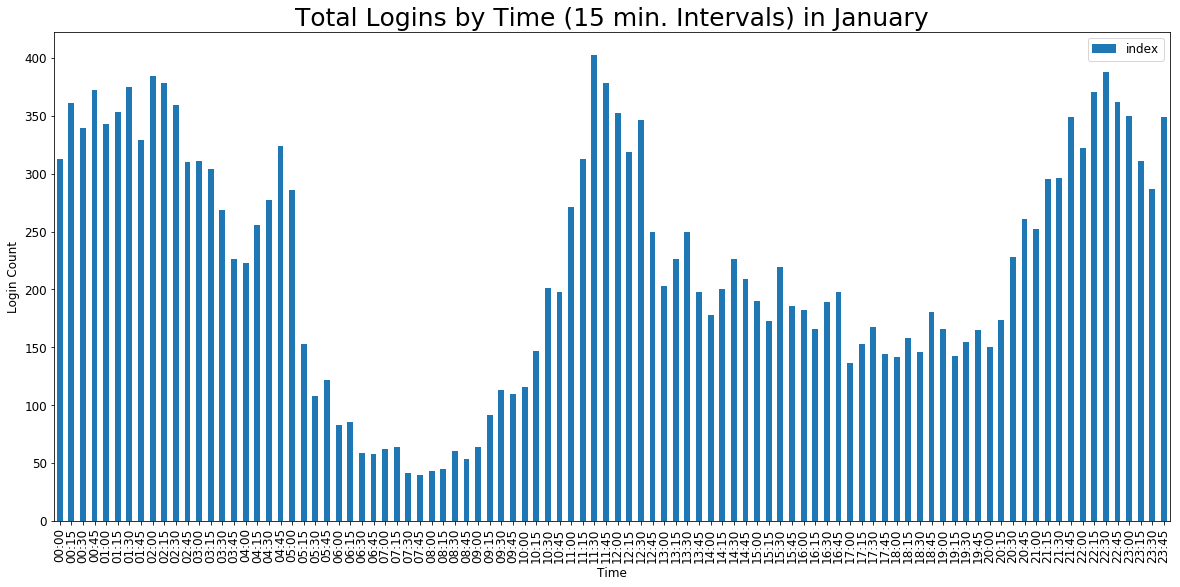

In [90]:
january.plot(x='time', y='index', kind='bar')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.title("Total Logins by Time (15 min. Intervals) in January" , fontsize=25)
plt.figure(figsize=(15, 15))
plt.show()

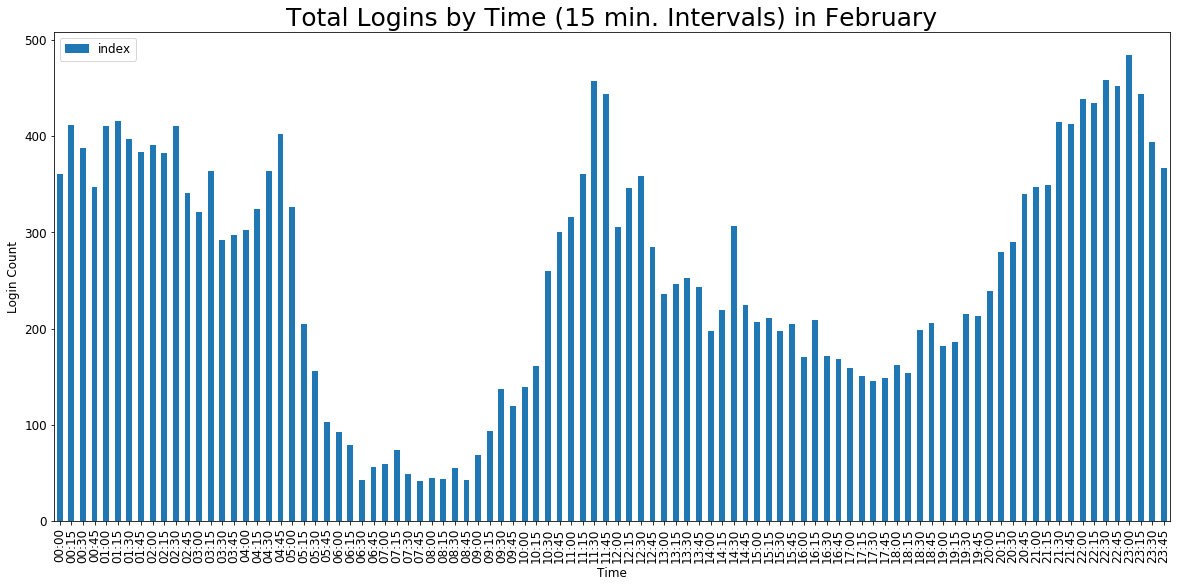

In [91]:
february = grouped_by_month.loc[grouped_by_month['month'] == 'Feb']
february.plot(x='time', y='index', kind='bar')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.title("Total Logins by Time (15 min. Intervals) in February", fontsize=25)
plt.figure(figsize=(15, 15))
plt.show()

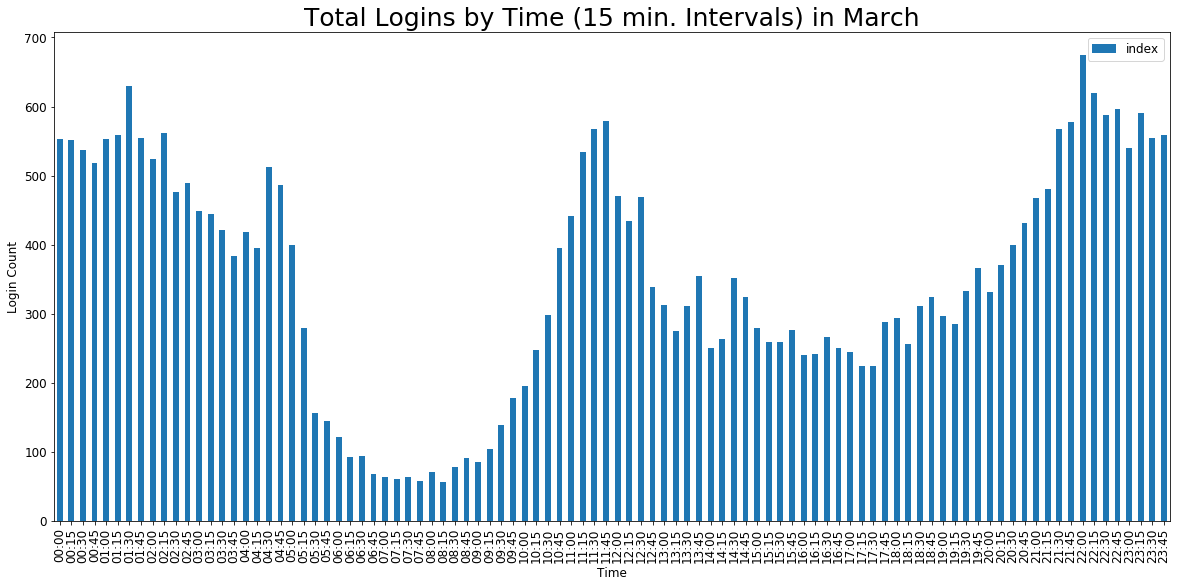

In [92]:
march = grouped_by_month.loc[grouped_by_month['month'] == 'Mar']
march.plot(x='time', y='index', kind='bar')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.title("Total Logins by Time (15 min. Intervals) in March", fontsize=25)
plt.figure(figsize=(15, 15))
plt.show()

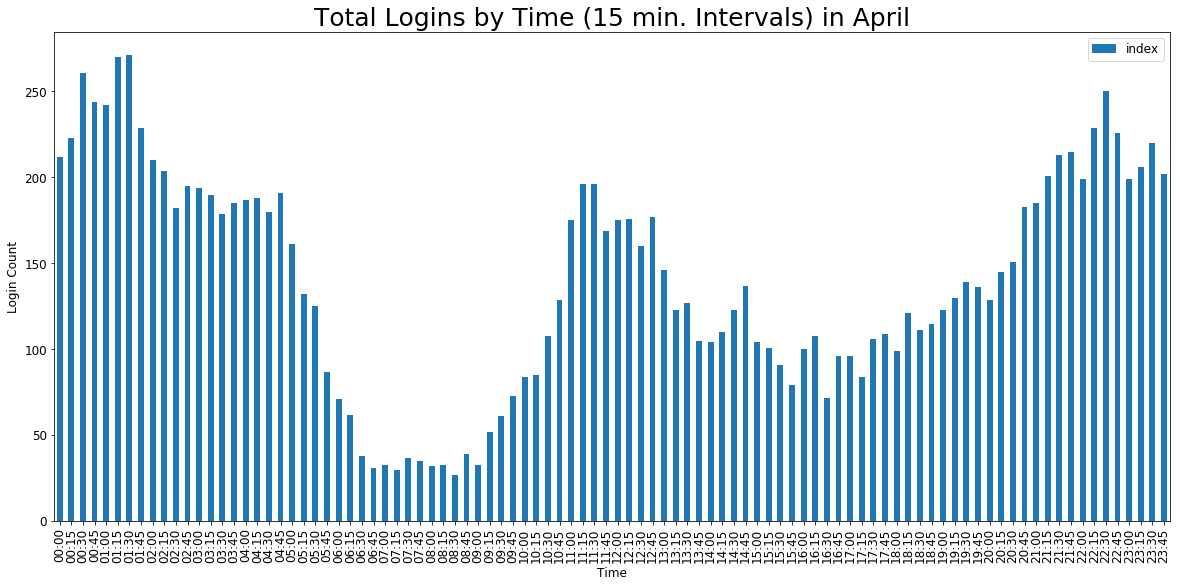

In [93]:
april = grouped_by_month.loc[grouped_by_month['month'] == 'Apr']
april.plot(x='time', y='index', kind='bar')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.title("Total Logins by Time (15 min. Intervals) in April", fontsize=25)
plt.figure(figsize=(15, 15))
plt.show()

Visualizations indicate that the pattern does not significantly differ based on month.  This general daily pattern is found across the data in January, February, March, April.  There are slight variation in the pattern, but the general pattern appears to persist across the board for each of the months in the data. 

## Part 2 ‑ Experiment and metrics design

1. The company wants to figure out if getting rid of toll fees for drivers will make fewer drivers drive exclusively in Metropolis and Gotham during weekdays.  In order to ascertain if this approach works, the following strategy could be carried out:  
    - The company could track their drivers' location for a given weekday after the toll fees are gotten rid of.  They could count the number of drivers exclusively in Gotham and Metropolis, and the number of drivers that drove in both cities after the toll fees were removed.  If a statistically significant number of drivers go to both cities (in comparison to the number that went to both cities when the toll fees were in place), then the city's initiative could be considered a success.

2. The test could be conducted as follows:
    - a. Implement the new policy of removing toll fees for a given week.  Choose a specific day during that week to track drivers' locations (Gotham, Metropolis, or both).
    - b. Use the following test statistic to obtain the z statistic, which can be used to find the p-value:
        z = p− p0 / √p(1 − p)/n <br>
    - c. If removing the toll fees results in a statistically significant number of drivers working both cities (p < 0.05), it can be recommended to city leaders to implement this new policy.  

## Part 3 ‑ Predictive modeling

In [132]:
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

In [133]:
df = pd.DataFrame(data)

In [134]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [135]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [137]:
df.last_trip_date.max() 

'2014-07-01'

The data was pulled 7/1/2014.  Thus, an "active" rider is one who took a trip between 6/1/2014 and 7/1/2014.

In [138]:
df['datetime_last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [139]:
thirtydaysago = datetime.strptime("2014-06-01", "%Y-%m-%d")

Create new column for binary classification:

In [140]:
def activeornot(row):
    if row['datetime_last_trip_date'] >= thirtydaysago:
        val = 1
    elif row['datetime_last_trip_date'] < thirtydaysago:
        val = 0
    return val

df['active'] = df.apply(activeornot, axis=1)

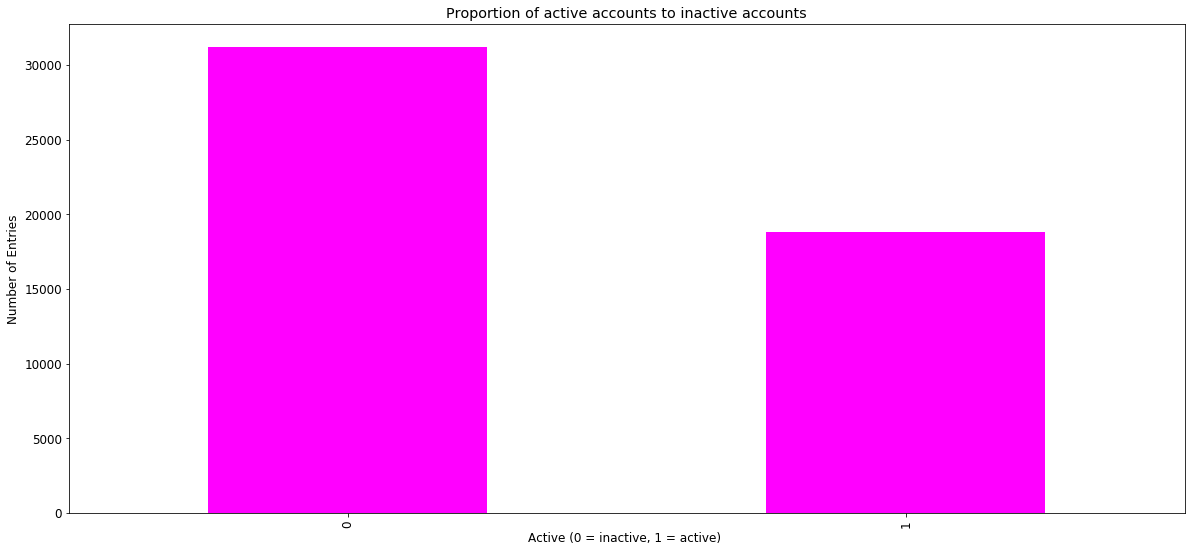

In [141]:
df['active'].value_counts().plot(kind='bar', color='magenta')
plt.title('Proportion of active accounts to inactive accounts')
plt.ylabel('Number of Entries')
plt.xlabel('Active (0 = inactive, 1 = active) ')


In [142]:
df['active'].value_counts()

0    31196
1    18804
Name: active, dtype: int64

There are significantly more active accounts that inactive accounts in the data. 

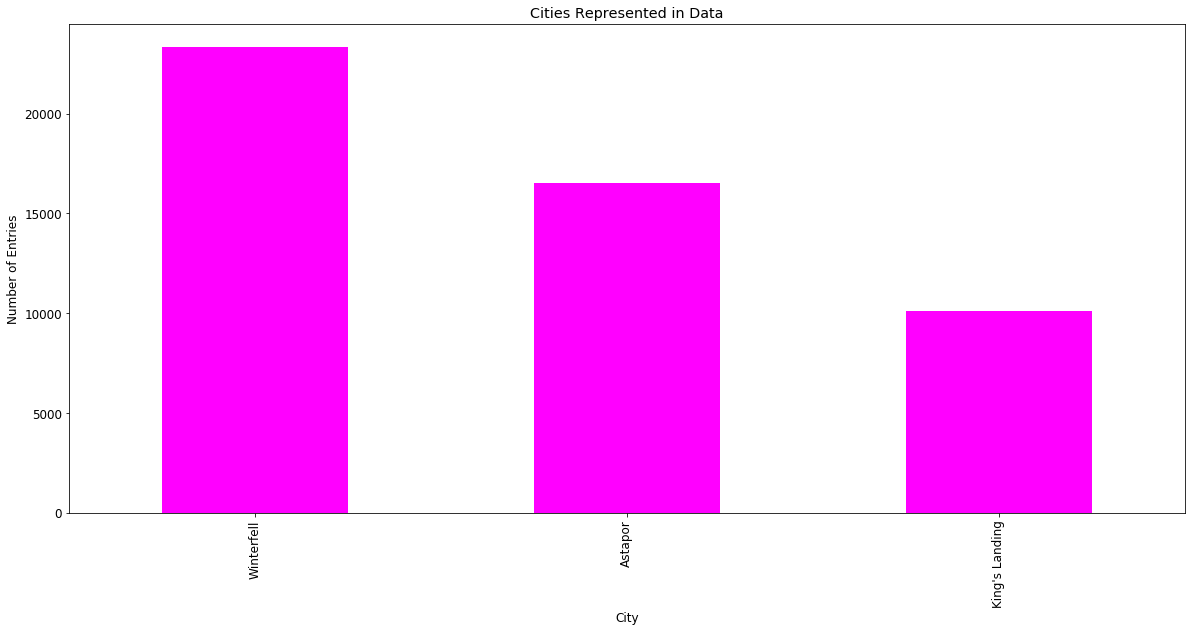

In [143]:
df['city'].value_counts().plot(kind='bar', color='magenta')
plt.title('Cities Represented in Data')
plt.ylabel('Number of Entries')
plt.xlabel('City')

There are three cities represented in the data, with the majority of observations having winterfell as their city.

Are counts for various features different, depending on whether an account is in active?

0
1


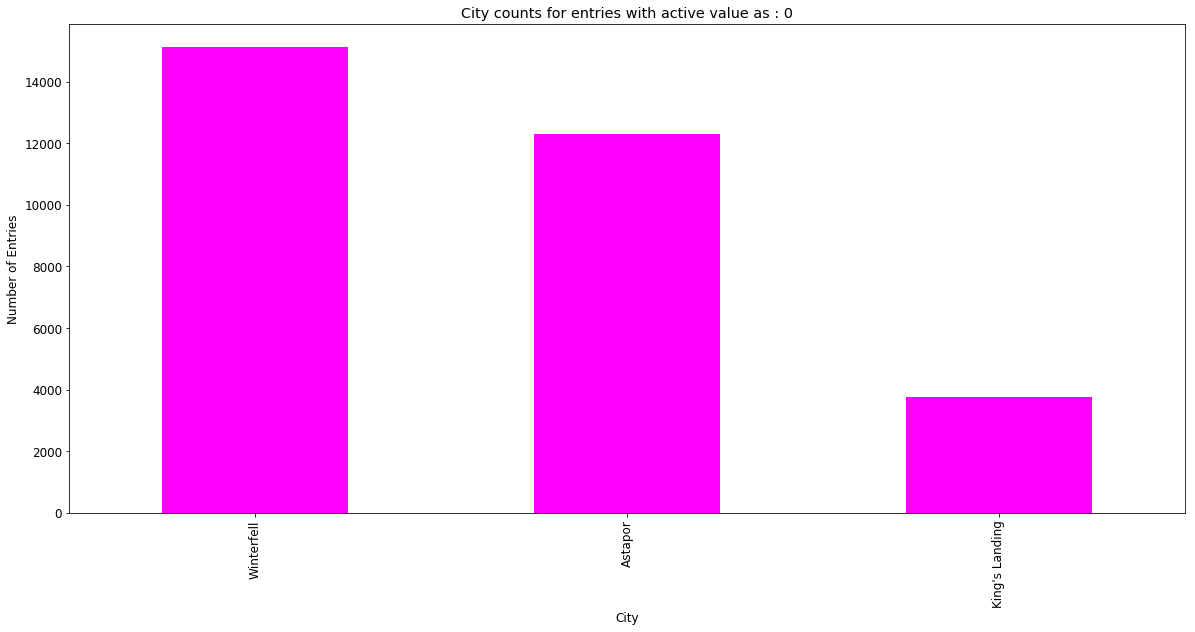

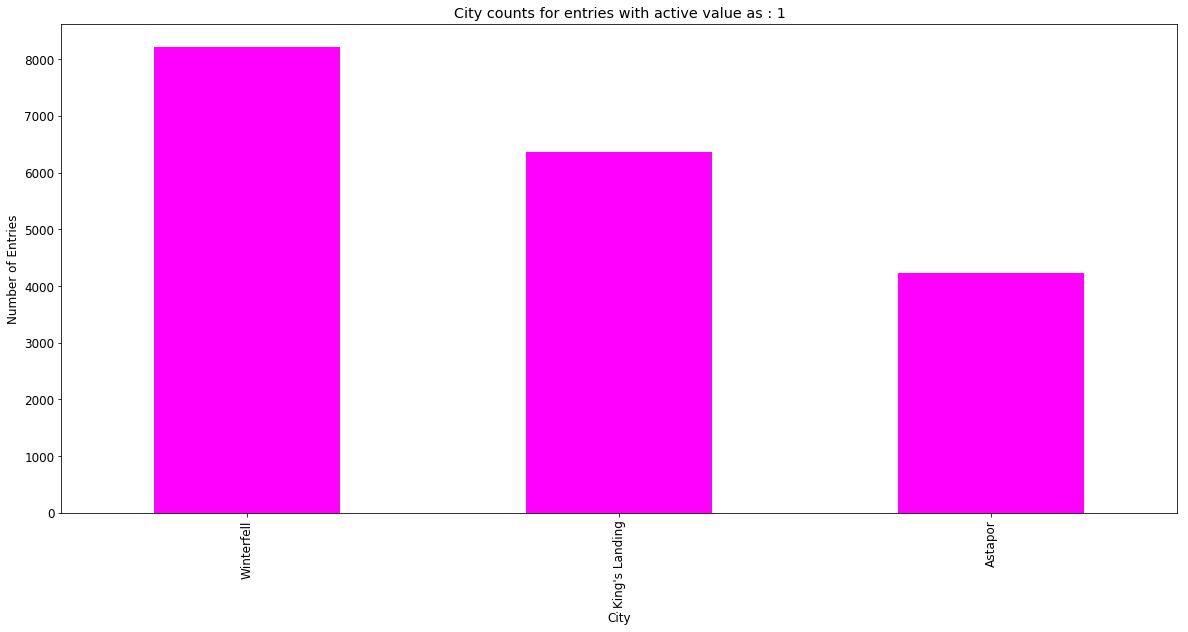

In [159]:
grpd = df.groupby('active')
for name, data in grpd:
   # print (data.head())
    print (name)
    plt.figure()
    plt.ylabel('Number of Entries')
    plt.xlabel('City')
    plt.title("City counts for entries with active value as : " + str(name))
    data['city'].value_counts().plot(kind='bar', color='magenta')



0
1


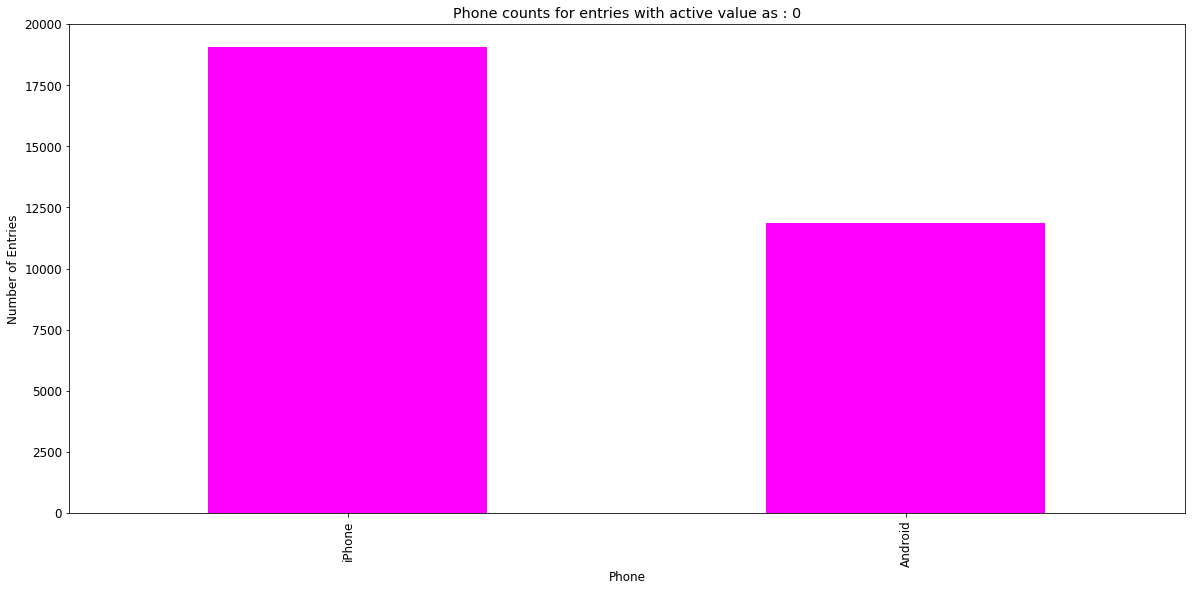

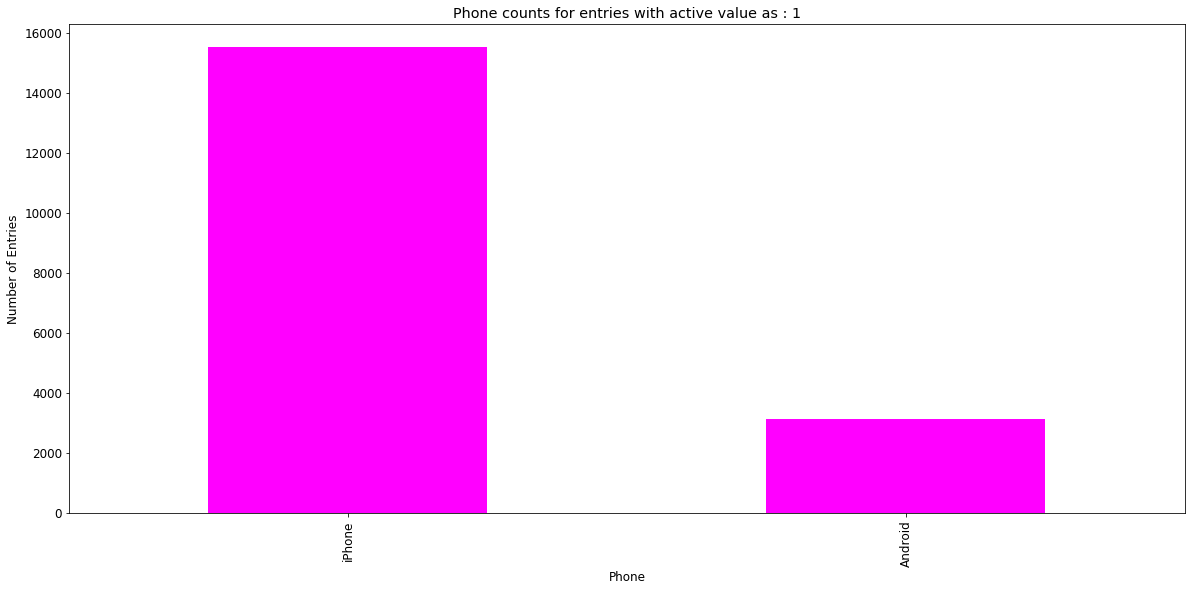

In [160]:
phone_grpd = df.groupby('active')
for name, data in phone_grpd:
    print (name)
    plt.figure()
    plt.ylabel('Number of Entries')
    plt.xlabel('Phone')
    plt.title("Phone counts for entries with active value as : " + str(name))
    data['phone'].value_counts().plot(kind='bar', color='magenta')

The above bar charts show that active accounts were more likely to use an iPhone, as opposed to an Android.

In [184]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,datetime_last_trip_date,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15,0


Some cleaning/pre-processing before predictive modeling:

In [192]:
df = df.drop(['datetime_last_trip_date', 'last_trip_date', 'signup_date'], 1)

In [185]:
dummies_city = pd.get_dummies(df['city']).rename(columns=lambda x: 'city_' + str(x))
df = pd.concat([df, dummies_city], axis=1)

In [187]:
df = df.drop(['city'], 1)

In [190]:
dummies_phone = pd.get_dummies(df['phone']).rename(columns=lambda x: 'phone_' + str(x))
df = pd.concat([df, dummies_phone], axis=1)
df = df.drop(['phone'], 1)

In [193]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,0,1,1,0


In [201]:
df = df.fillna(0)

## Predictive Modeling

I used three commonly-used predictive models: logistic regression, K-nearest neighbors, and Random Forests.  I chose this three models because they are quite standard, commonly-used machine learning models.

In [225]:
X = df.loc[:, df.columns != 'active']
y = df.active

In [226]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0,1,1,0


In [227]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.72688


In [228]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("Accuracy:" + str(knn.score(X_test, y_test)))

Accuracy:0.75576


In [229]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.76176


Each of the models had significant predictive power, with Random Forests being the most accurate.  The Random Forest model from scikit-learn also has a feature_importances_ attribute, which can show us which features were the most important:

In [230]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print (feature_importances)

                        importance
avg_dist                  0.298991
weekday_pct               0.132956
avg_rating_by_driver      0.117401
trips_in_first_30_days    0.081453
avg_rating_of_driver      0.081009
surge_pct                 0.078189
avg_surge                 0.065919
city_King's Landing       0.044466
ultimate_black_user       0.030484
phone_Android             0.022757
phone_iPhone              0.018776
city_Astapor              0.016118
city_Winterfell           0.011482


It appears that 'average distance' was by far the most predictive feature considered whether an account was active or inactive.  'Weekday percentage' was also quite significant.  This indicates that user activity is linked to the kinds of trips that users are interested in taking. 

## Insights ##

It appears that 'average distance', 'weekday percentage' (i.e., the percent of the user’s trips occurring during a weekday), and 'average rating by driver' (the rider’s average rating over all of their trips) are most predictive of account activity, per the random forests model. This indicates that riders most interested in continuing using Ultimate need it for a specific transportation purpose.  The importance of the 'average rating by driver' feature indicates that users that are pleased with their drivers are more likely to have active accounts.  Thus, Ultimate could boost rider retention by looking into issues regarding rider satisfaction.